In [1]:
import numpy as np

# generate data

In [2]:
# In real world, you cannot learn how the data was generated. So do not rely on this function when coding your lab.
def generate_data(dim, num):
    x = np.random.normal(0, 10, [num, dim])
    coef = np.random.uniform(-1, 1, [dim, 1])
    pred = np.dot(x, coef)
    pred_n = (pred - np.mean(pred)) / np.sqrt(np.var(pred))
    label = np.sign(pred_n)
    mislabel_value = np.random.uniform(0, 1, num)
    mislabel = 0
    for i in range(num):
        if np.abs(pred_n[i]) < 1 and mislabel_value[i] > 0.9 + 0.1 * np.abs(pred_n[i]):
            label[i] *= -1
            mislabel += 1
    return x, label, mislabel/num

In [3]:
# example
x, y, mr = generate_data(5, 100)

In [4]:
x[:5], y[:5]

(array([[-17.19811059,  -1.94992009,  -3.73357493,   8.69280325,
           2.05885002],
        [ -6.75523318,   6.25129043,  -1.27437915,  -3.36257746,
           5.17621935],
        [  2.47329424,   5.50981492,   6.09717014, -13.65053256,
          -8.95998392],
        [ 14.41172323,   6.23103376,  -3.27110175,  -4.43017055,
          -1.4681397 ],
        [ -0.81296464,  -0.90958239,  10.32312901,   8.61194659,
          -7.25994791]]),
 array([[-1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.]]))

# write your model class

In [5]:
# you can do anything necessary about the model
class SVM1:
    def __init__(self, dim, C):
        """
        You can add some other parameters, which I think is not necessary
        """
        self.dim = dim
        self.C = C

    def cost_func(self, X, y, theta, b):
        """The cost function"""
        result = 0
        for i in range(X.shape[0]):
             y_pre = X[i].dot(theta.T) + b
             if y[i] * y_pre >= 1 :
                 continue
             else :
                 result = result + (1 - y[i] * y_pre)
        result = result / X.shape[0]
        result = self.C * result + (np.linalg.norm(theta) ** 2) / 2

        return result

    def fit(self, X, y, lr=0.00001, tol=1e-4, max_iter=10):
        """
        Fit the coefficients via your methods
        """
        theta = np.zeros((1, self.dim))  # initialize the parameters
        b = 0
        gradient = 0

        cost = []    # get cost for making table

        for j in range(max_iter):
            for i in range(X.shape[0]):
                if y[i] * (X[i].dot(theta.T)) >= 1:
                    gradient = 0
                    grad_b = 0
                else :
                    gradient = -y[i] * X[i]
                    grad_b = -y[i]
                gradient = theta + (self.C * gradient)
                grad_b = self.C * grad_b
                theta = theta - lr * gradient
                b = b - lr * grad_b
                cost.append(self.cost_func(X, y, theta, b))

            if np.linalg.norm(lr * gradient) < tol:
                break

        self.theta = theta
        self.b = b

        return theta, cost
        
    def predict(self, X):
        """
        Use the trained model to generate prediction probabilities on a new
        collection of data points.
        """
        theta, b = self.theta, self.b
        y_pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            y = X[i].dot(self.theta.T) + b
            if y > 0:
                y_pred[i] = 1
            else :
                y_pred[i] = -1

        return y_pred

In [6]:
import random

# you can do anything necessary about the model
class SVM2:
    def __init__(self, dim, C):
        """
        You can add some other parameters, which I think is not necessary
        """
        self.dim = dim
        self.C = C

    def cost_func(self, X, y, theta, b):
        """The cost function"""
        result = 0
        for i in range(X.shape[0]):
             y_pre = X[i].dot(theta.T) + b
             if y[i] * y_pre >= 1 :
                 continue
             else :
                 result = result + (1 - y[i] * y_pre)
        result = result / X.shape[0]
        result = self.C * result + (np.linalg.norm(theta) ** 2) / 2

        return result

    def randJ(self, i, lens):
        """
        randomly choose the second alphas
        """
        j = i
        while j == i:
            j = int(random.uniform(0, lens))
        return j

    def selectJ(self, i, Ei, alphas, X, y, b):
        """
        choose the second alphas with the biggest delta
        """
        maxJ = -1; maxDelta = 0; Ej = 0
        for k in range(X.shape[0]):
            if k == i: continue
            Ek = self.calE(X, y, k, b, alphas)
            delta = abs(Ei - Ek)
            if (delta > maxDelta):
                maxJ = k; maxDelta = delta; Ej = Ek
        return maxJ, Ej
        # else:   #in this case (first time around) we don't have any valid eCache values
        #     j = self.randJ(i, X.shape[0])
        #     Ej = np.multiply(alphas, y).T * (X * X[j].T) + b - y[j]
        # return j, Ej

    def calE(self, X, y, i, b, alphas):
        Ei = np.multiply(y, alphas).T @ X @ X[i].T + b - y[i][0]
        return Ei[0]

    def fit(self, X, y, max_iter=10, tol=1e-4):
        """
        Fit the coefficients via your methods
        """
        alphas = np.zeros((X.shape[0], 1))
        iters, b = 0, 0
        theta = np.zeros((1, self.dim))
        n = X.shape[0]
        cost = []

        # return 0, 0

        for iters in range(max_iter):
            # alphaPairsChanged = 0
            for i in range(n):
                # return 0, 0
                Ei = self.calE(X, y, i, b, alphas)
                # return 0, 0
                if ((y[i][0] * Ei < -tol) and (alphas[i][0] < self.C)) or \
                   ((y[i][0] * Ei > tol) and (alphas[i][0] > 0)):
                    j = self.randJ(i, n)
                    Ej = self.calE(X, y, j, b, alphas)
                    oldI = alphas[i][0]
                    oldJ = alphas[j][0]

                    if y[i] != y[j]:
                        L = max(0, alphas[j][0] - alphas[i][0])
                        H = min(self.C, self.C + alphas[j][0] - alphas[i][0])
                    else:
                        L = max(0, alphas[j][0] + alphas[i][0] - self.C)
                        H = min(self.C, alphas[j][0] + alphas[i][0])
                    if L == H:
                        continue

                    Kii = X[i] @ X[i].T
                    Kjj = X[j] @ X[j].T
                    Kij = X[i] @ X[j].T

                    eta = Kii + Kjj - 2 * Kij
                    if eta <= 0:
                        continue
                    alphas[j][0] = oldJ + y[j][0] * (Ei - Ej) / eta
                    # print(alphas[j][0], H, L)
                    if alphas[j][0] > H:
                        alphas[j][0] = H
                    elif alphas[j][0] < L:
                        alphas[j][0] = L
                    # print(alphas[j][0], H, L)
                    alphas[i][0] = oldI + y[j] * y[i] * (oldJ - alphas[j][0])

                    b1 = b - Ei - y[i] * (alphas[i][0] - oldI) * Kii - y[j] * (alphas[j][0] - oldJ) * Kij
                    b2 = b - Ej - y[i] * (alphas[i][0] - oldI) * Kij - y[j] * (alphas[j][0] - oldJ) * Kjj
                    if (0 < alphas[i][0]) and (alphas[i][0] < self.C):
                        b = b1
                    elif (0 < alphas[j][0]) and (alphas[j][0] < self.C):
                        b = b2
                    else:
                        b = (b1 + b2) / 2
                        # alphaPairsChanged = alphaPairsChanged + 1
                    theta = np.multiply(y, alphas).T @ X
                    cost.append(self.cost_func(X, y, theta[0], b))
                    # print(Ej, Ei, alphas[j][0], i, oldI, Kii, eta, oldJ - y[j][0] * (Ei - Ej) / eta)

            # if alphaPairsChanged == 0: iters = iters + 1
            # else: iters = 0
            # print("1")
        self.theta = theta
        self.b = b

        return theta, cost
        
    def predict(self, X):
        """
        Use the trained model to generate prediction probabilities on a new
        collection of data points.
        """
        theta, b = self.theta, self.b
        y_pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            y = X[i].dot(self.theta.T) + b
            if y > 0:
                y_pred[i] = 1
            else :
                y_pred[i] = -1

        return y_pred

# construct and train your models

In [7]:
import matplotlib.pyplot as plt
dim = 20
size = 10000
train_size = 0.8

# generate data
X_data, y_data, mislabel = generate_data(dim, size)

# split data
rows = np.arange(size)
spilt_pos = int(size * train_size)
train_data_X = X_data[rows[: spilt_pos]]
test_data_X = X_data[rows[spilt_pos:]]
train_data_y = y_data[rows[: spilt_pos]]
test_data_y = y_data[rows[spilt_pos:]]

In [8]:
import time as t
model1 = SVM1(dim, 10)

start1 = t.time()
theta1, cost1 = model1.fit(train_data_X, train_data_y)
end1 = t.time()
end1 - start1

234.8130075931549

In [9]:
model2 = SVM2(dim, 1)

start2 = t.time()
theta2, cost2 = model2.fit(train_data_X, train_data_y)
end2 = t.time()

end2 - start2

1535.593418121338

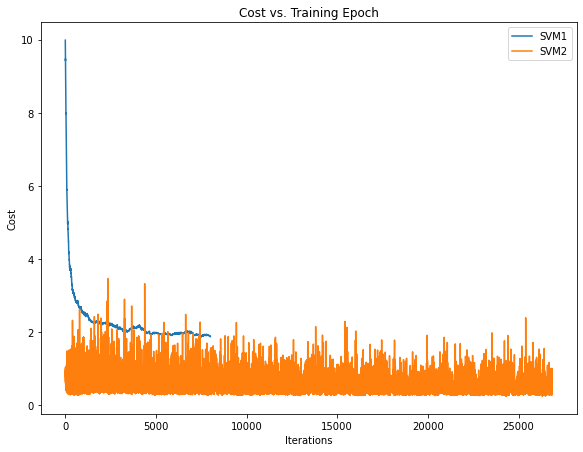

In [10]:
# constrcut model and train (remember record time)
cost1 = np.array(cost1)
cost2 = np.array(cost2)
fig, ax = plt.subplots(figsize=(9.6,7.2))
ax.plot(np.arange(len(cost1)), cost1)
ax.plot(np.arange(len(cost2)), cost2)
ax.legend(['SVM1', 'SVM2'], loc='upper right')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs. Training Epoch')
plt.show()

# predict and compare your results

In [11]:
# make prediction
y_pred1 = model1.predict(test_data_X)

# compared with answer

TP, FP, FN, TN = 0, 0 ,0 ,0

for i in range(y_pred1.shape[0]):
    if y_pred1[i] == -1 and test_data_y[i] == -1:
        TN = TN + 1
    elif y_pred1[i] == 1 and test_data_y[i] == 1:
        TP = TP + 1
    elif y_pred1[i] == -1 and test_data_y[i] == 1:
        FN = FN + 1
    elif y_pred1[i] == 1 and test_data_y[i] == -1:
        FP = FP + 1

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (FP + TP)
recall = TP / (TP + FN)

accuracy, 2 * precision * recall / (precision + recall)

# compare each methods

(0.9395, 0.9377251672671127)

In [12]:
# make prediction
y_pred2 = model2.predict(test_data_X)

# compared with answer

TP, FP, FN, TN = 0, 0 ,0 ,0

for i in range(y_pred2.shape[0]):
    if y_pred2[i] == -1 and test_data_y[i] == -1:
        TN = TN + 1
    elif y_pred2[i] == 1 and test_data_y[i] == 1:
        TP = TP + 1
    elif y_pred2[i] == -1 and test_data_y[i] == 1:
        FN = FN + 1
    elif y_pred2[i] == 1 and test_data_y[i] == -1:
        FP = FP + 1

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (FP + TP)
recall = TP / (TP + FN)

accuracy, 2 * precision * recall / (precision + recall)

(0.877, 0.8845070422535212)

In [13]:
def data_display(X:np.array, labels, savefig:str = "", cross_line = []):
    assert X.shape[1] == 2

    for s in range(X.shape[0]):
        if labels[s] == 1:
            plt.scatter(X[s][0], X[s][1], marker='o', c='m')
        else:
            plt.scatter(X[s][0], X[s][1], marker='x', c='y')


    if(cross_line):
        w, b = cross_line[0], cross_line[1]
        assert w.shape[0] == 2
        x = np.linspace(-20, 25, 100)
        y = (-w[0] * x - b) / w[1]
        plt.plot(x, y)

    if savefig != "":
        plt.savefig(savefig)

    plt.show()
    return

In [14]:
w, b = model1.theta, model1.b
if dim == 2:
    data_display(test_data_X, test_data_y, cross_line=[w.T, b])